# General:
- We used unsupervised learning for our model and used kmeans clustering to view the data results
- We tried 2 csv files for this code
  - Traffic.csv (clean and produced a good output)
  - Chicago_Traffic_Tracker_-_Historical_Congestion_Estimates_by_Segment_-_2011-2018.csv (confusing and an even more confusing output)



# First code:
- Importing Libraries:
  - pandas and numpy for data manipulation
  - KMeans from sklearn.cluster for clustering analysis
  - StandardScaler from sklearn.preprocessing for data standardization
  - matplotlib.pyplot and seaborn for visualization
  - make_blobs from sklearn.datasets for generating synthetic data (was only used in the begging but is unused here)
- Loading Data:
  - Reading a CSV file from the specified path (traffic.csv) and placing it in the pandas df (DataFrame)

In [13]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
import pandas as pd

df = pd.read_csv("traffic.csv")

- Missing Values Check:
  - df.isnull().sum() counts and prints the number of missing values in each column of the df
- Handling Missing Data:
  - df.dropna() removes all rows with missing values from df
  - The cleaned DataFrame is reassigned to df to continue with a clean dataset

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (if any)
df = df.dropna()

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64


- Data Preparation:
  - Removing the 'DateTime' column from the df to be able to plot the correlation matrix and storing the result in df_corr_input to exclude non-numeric data from correlation analysis
- Correlation Calculation:
  - Computing the correlation matrix (corr_matrix) for the numeric columns using df_corr_input.corr()
- Visualization:
  - Uses sns.heatmap() to plot the correlation matrix with annotations (annot=True) and a color gradient (cmap='coolwarm')
  - Adds a title (plt.title()) and displays the plot (plt.show())

- The correlation matrix shows that the values are not highly correlated meaning all the columns are important to keep and there is no redundant data
- The data will be used without further cleaning

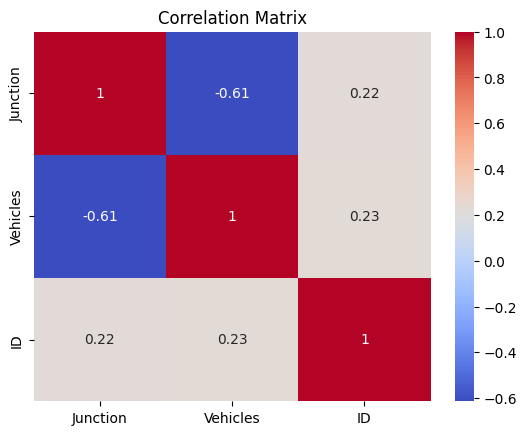

In [15]:
# Drop unwanted column
df_corr_input = df.drop(columns=['DateTime'])

# Compute correlation matrix
corr_matrix = df_corr_input.corr()

# Plot the actual correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

- When we came to run the scaler, it did not work because the column DateTime contained non-numerical data; we needed to change the data into a numerical type
- Imports Libraries:
  - datetime for handling date/time operations
- Function time_convert(dt_str):
  - Converts a datetime string (dt_str) from the format '%Y-%m-%d %H:%M:%S' to a timestamp (integer)
- Process DataFrame Column (df['DateTime']):
  - Iterates over each datetime string in the column
  - Applies time_convert() to each string and stores the result in list Y
- This way we have a list of the new DateTime timestamps in numerical form and can continue

In [16]:
from datetime import datetime

def time_convert(dt_str):
  dt_obj=datetime.strptime(dt_str, '%Y-%m-%d %H:%M:%S')
  timestamp=int(dt_obj.timestamp())
  return timestamp

my_datetime = df['DateTime']
Y=[]
for t in my_datetime:
  y=time_convert(t)
  Y.append(y)

- Here we created a library (data = {}) with the two columns that we wanted to keep to train the kmeans on, then placed this library into a new dataframe df_adjusted = (pd.DataFrane(data))
- We removed junction in this step because logically it would not matter to training congestion tracking based on the junction location, rather than the amount of cars per timestamp.

In [17]:
data = {
    'DateTime': Y,
    'Vehicles': df["Vehicles"]
}

df_adjusted = pd.DataFrame(data)

- Standardization:
  - Uses StandardScaler() to scale features in df_adjusted, transforming data to have mean=0 and standard deviation=1
- Fit & Transform:
  - scaler.fit_transform() calculates the mean (fit) and scales the data (transform) in one step
- Output:
  - Prints the scaled data (scaled_data), now suitable for algorithms like K-Means that are sensitive to feature scales

In [18]:
# Scale features (important for K-Means)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_adjusted)
print(scaled_data)

[[-1.80658347 -0.37548875]
 [-1.8063506  -0.47187501]
 [-1.80611772 -0.61645439]
 ...
 [ 1.59062912 -0.32729563]
 [ 1.590862   -0.03813687]
 [ 1.59109487 -0.52006813]]


- We defined the number of clusters outside of kmeans for ease of change
- K-Means Clustering:
  - Implements the K-Means algorithm with k=6 clusters using sklearn.cluster.KMeans
- Parameters:
  - init='k-means++': using k-means++ for faster processing and better clustering
  - random_state=42: Ensures reproducibility of results
- Execution:
  - kmeans.fit(scaled_data): Fits the model to the standardized data (scaled_data)
  - labels: Assigns each data point to one of the 6 clusters
  - centroids: Computes the coordinates of each cluster center
- Output:
  - Prints the number of labels (matches data points) and centroid locations (6 centroids, one per cluster)



In [19]:
k=6
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans.fit(scaled_data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

print(len(labels))
print(centroids)

48120
[[-1.30794748 -0.53435092]
 [ 1.00523597 -0.4852254 ]
 [ 0.95520125  0.8833427 ]
 [-0.17632696 -0.46293391]
 [-0.62618528  0.863192  ]
 [ 0.81927208  2.75967622]]


- Visualization Setup:
  - Creates an 8x6 inch figure for plotting traffic congestion clusters
  - Defines colors and labels for 6 congestion zones ("Very Low" to "Very High")
- Data Preparation:
  - Reverts scaled data (scaled_data) back to original scale using scaler.inverse_transform() for better legibility of car numbers
- Plots each cluster’s data points with:
  - Color-coding by congestion level
  - Small point size (s=2) and transparency (alpha=0.6) for clarity
- Centroids:
  - Transforms cluster centroids to original scale and plots them as black 'X' markers (s=200 for visibility)
- Labels & Title:
  - X-axis: "Time" (timestamp-converted)
  - Y-axis: "Vehicles" (volume of cars)
  - Title: "Traffic Congestion Clustering"
  - Includes a legend to map colors to congestion labels


 - The unscaled data representation makes the graph a lot more graphically legible and accurate in representation to the realworld.
 - The vehicle count is logical numbers, and the clusters are labeled correctly based on number of cars.

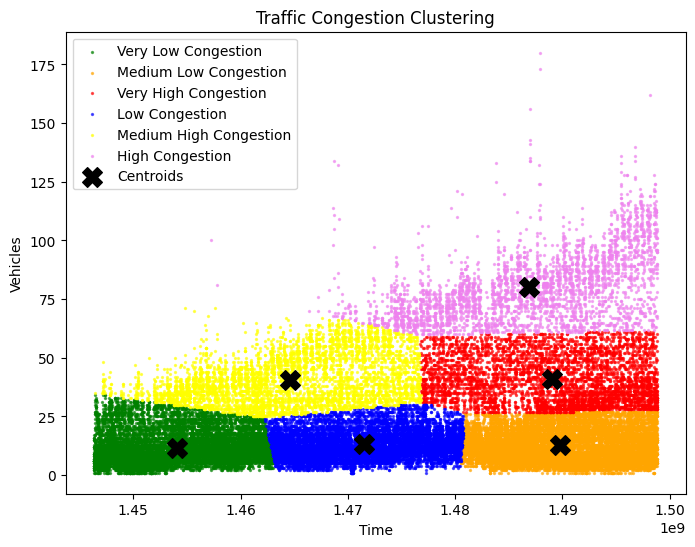

In [20]:
plt.figure(figsize=(8,6))
colors = ['green','orange','red','blue','yellow','violet']
zone_labels = ['Very Low Congestion','Medium Low Congestion','Very High Congestion','Low Congestion', 'Medium High Congestion','High Congestion']

unscaled_data=scaler.inverse_transform(scaled_data)
for i in range (k):
  plt.scatter(unscaled_data[labels == i][:,0],unscaled_data[labels==i][:,1], c=colors[i],label=zone_labels[i], s=2,alpha=0.6)

centroids=scaler.inverse_transform(centroids)
plt.scatter(centroids[:,0],centroids[:,1],c='black',s=200,marker='X',label='Centroids')
plt.xlabel("Time")
plt.ylabel("Vehicles")
plt.title("Traffic Congestion Clustering")
plt.legend()

plt.show()


- Congestion Distribution Visualization:
  - Uses np.bincount(labels) to count data points in each cluster
  - Creates a pie chart (plt.pie) to show the percentage in each congestion level
- Customization:
  - Labels: Uses predefined zone_labels 
  - Colors: Matches clusters to colors (e.g., green for "Very Low")
  - Percentages: Displays percentages (autopct='%1.1f%%') for each slice
- Output:
  - Titles the chart "Congestion Level Distribution" and displays it (plt.show())


- The main amount of data is in the low congestion, meaning the trained model may have a bias towards the lower 3 congestion levels.

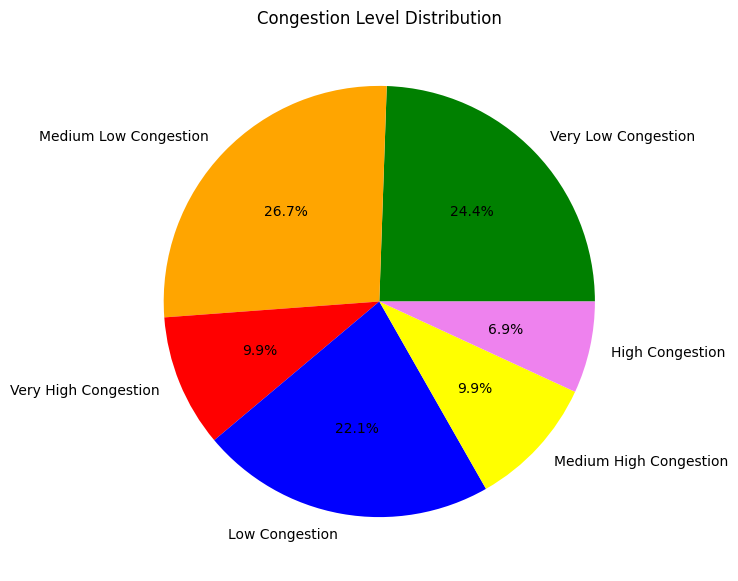

In [21]:
cluster_counts = np.bincount(labels)
plt.figure(figsize=(7, 7))
plt.pie(cluster_counts, labels=zone_labels, colors=colors, autopct='%1.1f%%')
plt.title('Congestion Level Distribution')
plt.show()

- This code is to use the actual trained model to predict congestion based on car number, and if available the timestamp
- It created a function (predict_congestion) that takes two inputs vehicles and timestamp, the timestamp is initially set to none as it does not necessarily need a timestamp to predict
- If the timestamp is none it sets the timestamp to the current time and continues
- It then created a dataframe with the inputted values and scales it to be able to be predicted
- It predicts it based on the congestion labels that were already pre-set in the training, and returns the congestion label for the entered value


- Results:
  - As hypothesized before it has a bias towards the lower 3 congestions, as the prediction for 100 cars is supposed to be in the high congestion range, yet it was predicted as Medium Low Congestion
  - The only way it predicts high congestion is with very high numbers such as 300
  - It also cannot separate the low congestions well enough, as it gives medium low congestion for even a very low number as 5 cars.

In [22]:
# KMeans Prediction

# Function to predict congestion for a new input
def predict_congestion(vehicles, timestamp=None):
    # If no timestamp is provided, use the current time
    if timestamp is None:
        import time
        timestamp = int(time.time())

    # Prepare the input as a 2D array
    input_data = {'DateTime': [timestamp], 'Vehicles': [vehicles]}
    input_data_adjusted = pd.DataFrame(input_data)

    # Scale the input using the same scaler
    scaled_input = scaler.transform(input_data_adjusted)

    # Predict the cluster
    cluster = kmeans.predict(scaled_input)[0]

    # Map the cluster to a congestion label (as defined during training)
    congestion_labels = {
        0: "Very Low Congestion",
        1: "Medium Low Congestion",
        2: "Very High Congestion",
        3: "Low Congestion",
        4: "Medium High Congestion",
        5: "High Congestion"
    }

    return congestion_labels.get(cluster, "Unknown Cluster")

# Example usage:
print(predict_congestion(50))
print(predict_congestion(100))
print(predict_congestion(1))
print(predict_congestion(300))


Very High Congestion
High Congestion
Medium Low Congestion
High Congestion


- Trafficlight class for each direction (North-South, East-West, Turn Lane)
- Tracks vehicle_count, status (default "RED"), and green_duration (default 30s)
- Key Methods:
  - update_congestion(): Updates vehicle count and adjusts timing via predict_congestion (not defined in the snippet)
  - adjust_timing(): Sets green_duration based on congestion levels (e.g., 10s for "Very Low", 60s for "Very High")
- Simulation:
  - simulate_traffic_junction() generates random vehicle counts (0–300) for each light and prints their status

- Results:
  -  --- Traffic Junction Simulation —
  - North-South: Medium Low Congestion | Vehicles: 190 | Green Time: 20s
  - East-West: Medium Low Congestion | Vehicles: 78 | Green Time: 20s
  - Turn Lane: Medium Low Congestion | Vehicles: 71 | Green Time: 20s

  - As expected the bias has also affected the scenario, classifying a clearly logical separation as all Medium Low Congestion


- Results:
  - --- Traffic Junction Simulation --- 
  - North-South: Medium Low Congestion | Vehicles: 142 | Green Time: 20s 
  - East-West: High Congestion | Vehicles: 243 | Green Time: 45s 
  - Turn Lane: Medium Low Congestion | Vehicles: 64 | Green Time: 20s

  - Here it has finally classified something as High congestion but only at an illogically high vehicle count


In [23]:
# Junction Simulation
import time
import random

# Traffic light class for each direction
class TrafficLight:
    def __init__(self, name):
        self.name = name
        self.vehicle_count = 0
        self.status = "RED"
        self.green_duration = 30  # Default green duration in seconds

    def update_congestion(self, vehicle_count, timestamp=None):
        self.vehicle_count = vehicle_count
        self.congestion_level = predict_congestion(vehicle_count, timestamp)
        self.adjust_timing()

    def adjust_timing(self):
        # Adjust green duration based on congestion
        levels = {
            "Very Low Congestion": 10,
            "Low Congestion": 15,
            "Medium Low Congestion": 20,
            "Medium High Congestion": 30,
            "High Congestion": 45,
            "Very High Congestion": 60
        }
        self.green_duration = levels.get(self.congestion_level, 30)

    def __str__(self):
        return (f"{self.name}: {self.congestion_level} | "
                f"Vehicles: {self.vehicle_count} | Green Time: {self.green_duration}s")

# Create three lights: North-South, East-West, and Turn Lane
traffic_lights = [
    TrafficLight("North-South"),
    TrafficLight("East-West"),
    TrafficLight("Turn Lane")
]

# Simulate one round of traffic light adjustments
def simulate_traffic_junction():
    print("\n--- Traffic Junction Simulation ---")
    for light in traffic_lights:
        # Generate a random vehicle count between 0 and 300
        vehicle_count = random.randint(0, 300)
        light.update_congestion(vehicle_count)
        print(light)

simulate_traffic_junction()


--- Traffic Junction Simulation ---
North-South: High Congestion | Vehicles: 258 | Green Time: 45s
East-West: High Congestion | Vehicles: 215 | Green Time: 45s
Turn Lane: High Congestion | Vehicles: 199 | Green Time: 45s
